# Optimization via Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [3]:
def gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha=None):
    curr_x, prev_x = x0, np.inf
    curr_k = 0
    grad_x0, curr_grad = grad_fn(x0), grad_fn(curr_x)
    history_x = [x0]
    history_f = [fn(x0)]
    history_grad = [grad_x0]
    history_err = [np.linalg.norm(grad_x0, 2)]
    use_backtracking = alpha is None

    while (curr_k < k_max and 
            not (np.linalg.norm(curr_grad, 2) < tol_f*np.linalg.norm(grad_x0, 2)) and
            not (np.linalg.norm(curr_x - prev_x, 2) < tol_x)):
        if use_backtracking:
            alpha = backtracking(fn, grad_fn, curr_x)
        prev_x = curr_x
        curr_x = curr_x - alpha*grad_fn(curr_x)

        curr_grad = grad_fn(curr_x)
        curr_k += 1
        
        history_x.append(curr_x)
        history_f.append(fn(curr_x))
        history_grad.append(curr_grad)
        history_err.append(np.linalg.norm(curr_grad, 2))

    return history_x, curr_k, history_f, history_grad, history_err

## Tests definition

In [4]:
def runTestCase(fn, grad_fn, x_true, x0, k_max, tol_f, tol_x, alpha=None):
    history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha)

    print(f"alpha: {alpha if alpha is not None else 'backtracking'} | x0: {x0} | tol_f: {tol_f} | tol_x: {tol_x} | Iterations: {curr_k}/{k_max}")
    print(f"   || Prediction: {history_x[-1]} | f(pred)={fn(history_x[-1])}")
    if x_true is not None:
        print(f"   || Real: {x_true} | f(x_true)={fn(x_true)}")
        print(f"   || Rel. error: {np.linalg.norm(history_x[-1] - x_true) / np.linalg.norm(x_true)}")

    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(history_err)), history_err)
    plt.title("Gradient norm")
    plt.xlabel("iter")
    if x_true is not None:
        plt.subplot(1, 2, 2)
        plt.plot([np.linalg.norm(x - x_true, 2) for x in history_x])
        plt.title("Predicted point error")
        plt.xlabel("iter")
    plt.show()


def showContour(fn, grad_fn, x_true, x0, k_max, tol_f, tol_x, alpha=None, contour_area=(-10, 10)):
    history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha)

    x = np.linspace(contour_area[0], contour_area[1], 1000)
    y = np.linspace(contour_area[0], contour_area[1], 1000)
    x_contour, y_contour = np.meshgrid(x, y)
    z_contour = fn((x_contour, y_contour))

    history_f.sort()
    to_visualize_levels = [history_f[0]] + [history_f[i] for i in range(1, len(history_f)) if (history_f[i]-history_f[i-1]) >= 0.05]
    # to_visualize_levels = history_f
    contour_graph = plt.contour(x, y, z_contour, levels=to_visualize_levels)
    plt.clabel(contour_graph, inline=1, fontsize=10)
    plt.scatter([a[0] for a in history_x], [a[1] for a in history_x], marker="o")
    plt.scatter(x_true[0], x_true[1], marker="x", c="red", label="Optima")
    plt.legend()
    plt.show()

In [5]:
def testCase1():
    def f(x):
        x1, x2 = x
        return (x1 - 3)**2 + (x2 - 1)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 2*(x1-3), 2*(x2-1) ])
    
    return f, grad_f, np.array([3, 1]), 2


def testCase2():
    def f(x):
        x1, x2 = x
        return 10*(x1 - 1)**2 + (x2 - 2)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 20*(x1-1), 2*(x2-2) ])
    
    return f, grad_f, np.array([1, 2]), 2


def testCase3(n=5):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2) * np.linalg.norm(A@x - b, 2)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A)
    
    return f, grad_f, x_true, n


def testCase4(n=5, lamb=0.1):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2)*np.linalg.norm(A@x - b, 2)**2 + (lamb/2)*np.linalg.norm(x)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A) + (lamb*x.T)
    
    return f, grad_f, x_true, n


def testCase5():
    def f(x):
        return x**4 + x**3 - 2*x**2 - 2*x

    def grad_f(x):
        return 4*x**3 + 3*x**2 - 4*x - 2
    
    return f, grad_f, None, 1

## Test case 1

\begin{equation*}
    f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2
\end{equation*}

\begin{equation*}
    \nabla f(x_1, x_2) = \Big( 2(x_1-3), 2(x_2-1) \Big)
\end{equation*}

alpha: 0.01 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [2.94723616 0.98241205] | f(pred)=0.0030933586580570863
   || Real: [3 1] | f(x_true)=0
   || Rel. error: 0.01758794660572145


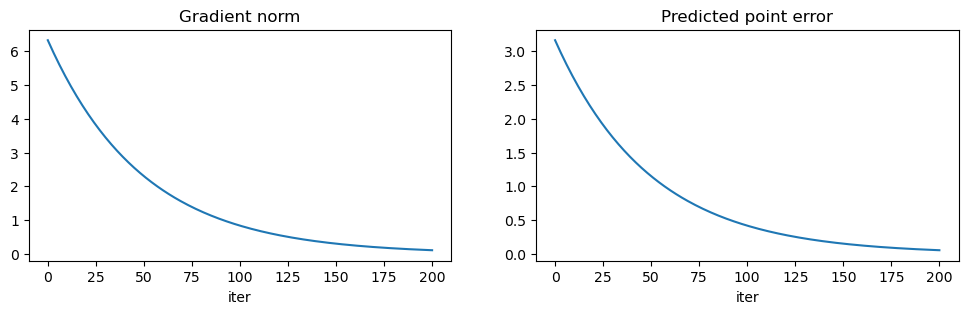

alpha: 0.1 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 61/200
   || Prediction: [2.99999632 0.99999877] | f(pred)=1.5030672532570336e-11
   || Real: [3 1] | f(x_true)=0
   || Rel. error: 1.22599643280763e-06


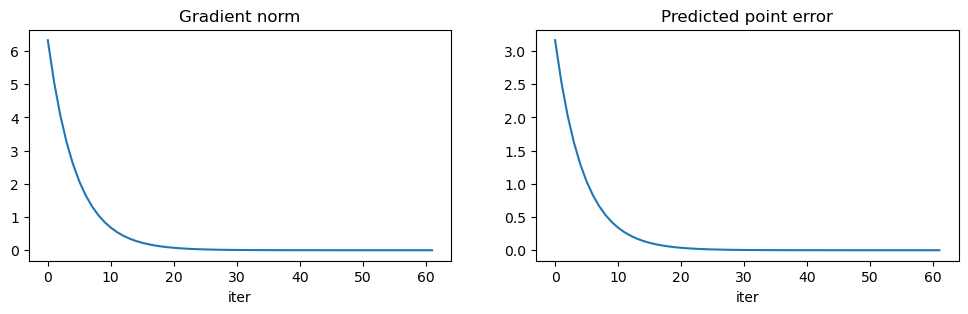

alpha: 0.2 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 28/200
   || Prediction: [2.99999816 0.99999939] | f(pred)=3.771117127521229e-12
   || Real: [3 1] | f(x_true)=0
   || Rel. error: 6.14094221396133e-07


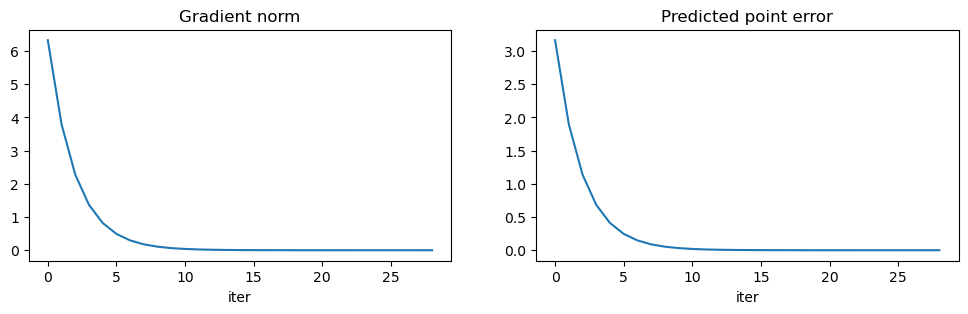

alpha: 0.5 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 1/200
   || Prediction: [3. 1.] | f(pred)=0.0
   || Real: [3 1] | f(x_true)=0
   || Rel. error: 0.0


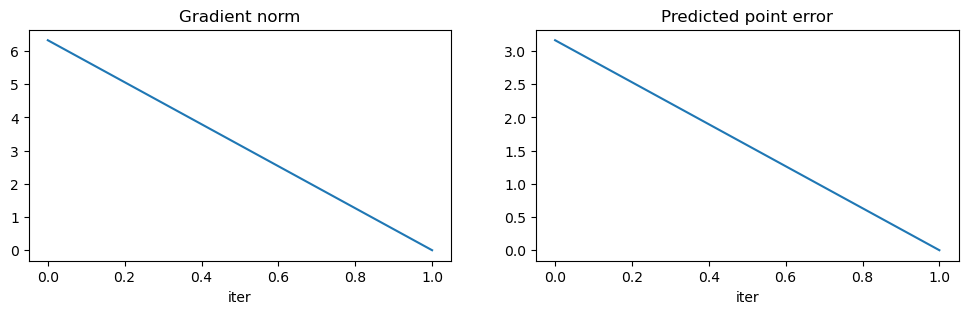

alpha: backtracking | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 98/200
   || Prediction: [2.99999378 0.99999793] | f(pred)=4.3010886344183096e-11
   || Real: [3 1] | f(x_true)=0
   || Rel. error: 2.0739066117880787e-06


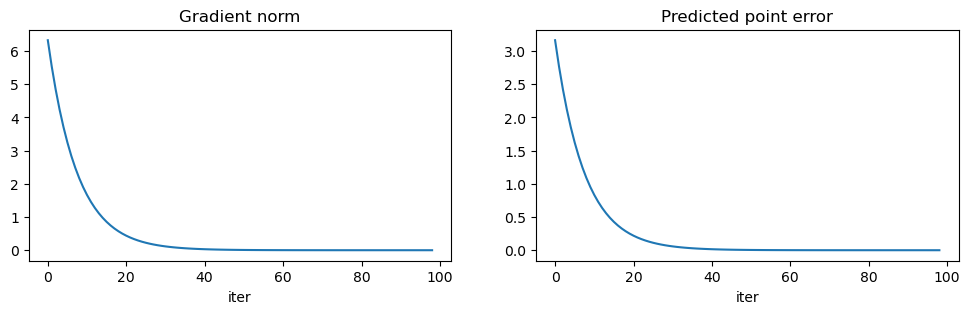

In [6]:
f, grad_f, x_true, input_size = testCase1()

for alpha in [0.01, 0.1, 0.2, 0.5, None]:
    runTestCase(
        f, grad_f, x_true, 
        x0 = np.zeros((input_size,)), 
        k_max = 200, 
        tol_f = 1e-6, 
        tol_x = 1e-6,
        alpha = alpha
    )

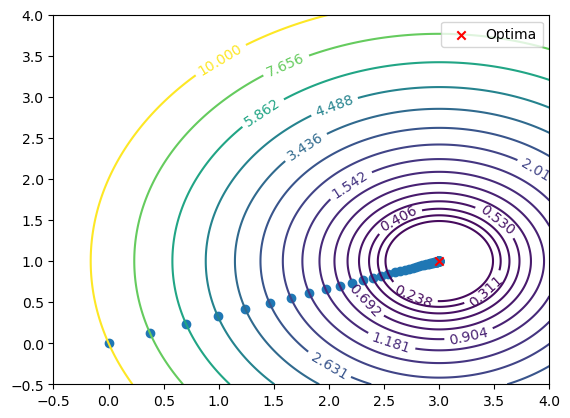

In [7]:
showContour(
    f, grad_f, x_true, 
    x0 = np.zeros((input_size,)),
    # x0 = np.array([8, 8]), 
    k_max = 200, 
    tol_f = 1e-6, 
    tol_x = 1e-6, 
    alpha = None,
    contour_area=(-0.5, 4)
)

## Test case 2

\begin{equation*}
    f(x_1, x_2) = 10(x_1 - 1)^2 + (x_2 - 2)^2
\end{equation*}

\begin{equation*}
    \nabla f(x_1, x_2) = \Big( 20(x_1 - 1), 2(x_2 - 2) \Big)
\end{equation*}

alpha: 0.01 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [1.         1.96482411] | f(pred)=0.0012373434632228252
   || Real: [1 2] | f(x_true)=0
   || Rel. error: 0.015731137678011882


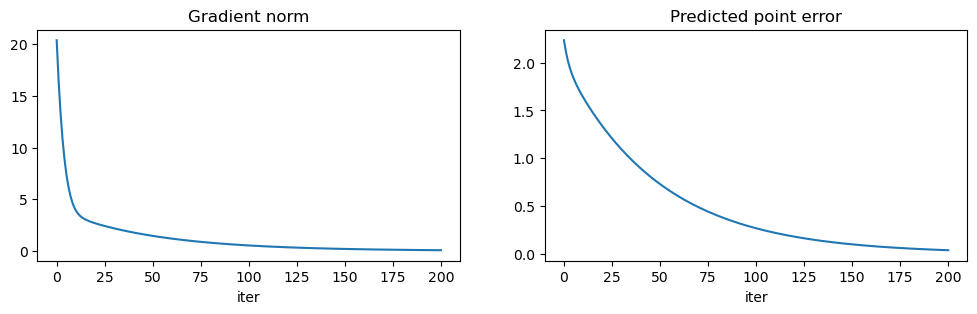

alpha: 0.1 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0. 2.] | f(pred)=10.0
   || Real: [1 2] | f(x_true)=0
   || Rel. error: 0.4472135954999579


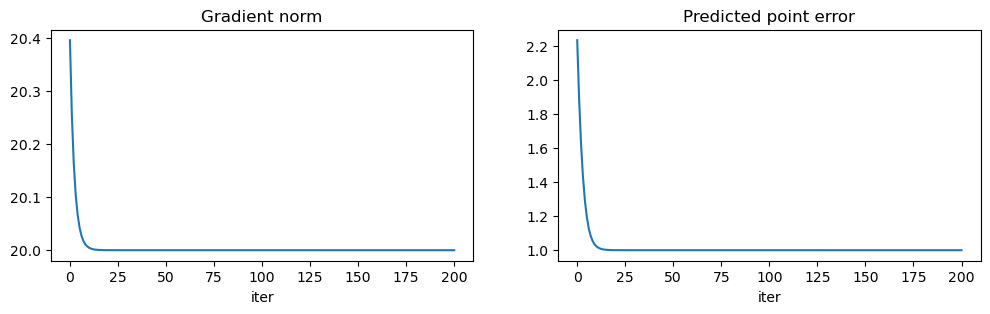

alpha: 0.2 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-2.65613989e+95  2.00000000e+00] | f(pred)=7.055079108655554e+191
   || Real: [1 2] | f(x_true)=0
   || Rel. error: 1.1878618698026764e+95


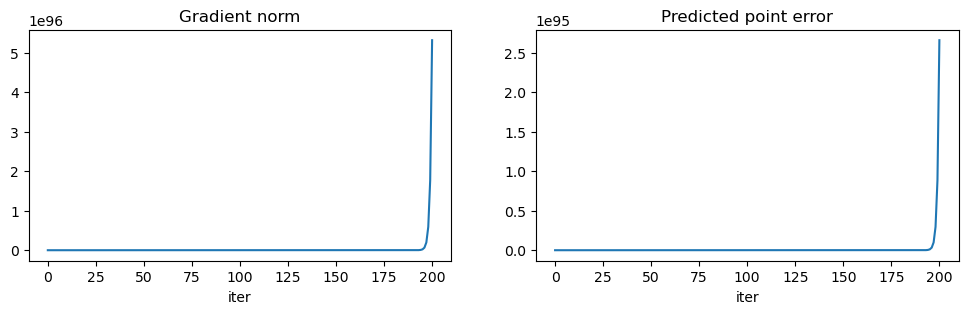

alpha: 0.5 | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-7.05507911e+190  2.00000000e+000] | f(pred)=inf
   || Real: [1 2] | f(x_true)=0
   || Rel. error: inf


/tmp/ipykernel_139462/1824161682.py:16: RuntimeWarning: overflow encountered in scalar multiply
  return 10*(x1 - 1)**2 + (x2 - 2)**2
/tmp/ipykernel_139462/1824161682.py:16: RuntimeWarning: overflow encountered in scalar power
  return 10*(x1 - 1)**2 + (x2 - 2)**2


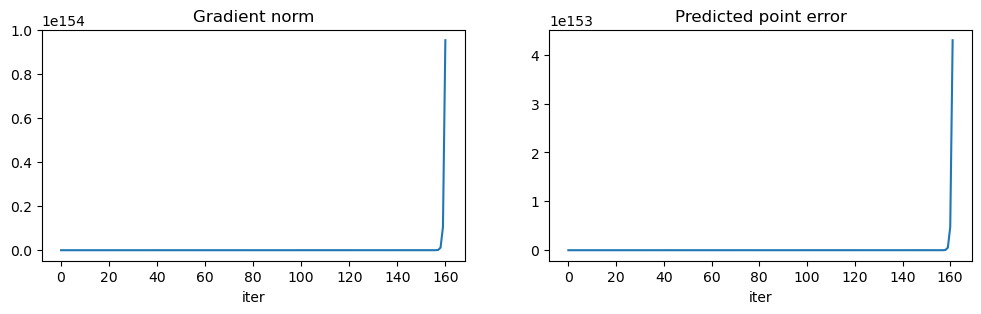

alpha: backtracking | x0: [0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 97/200
   || Prediction: [1.         1.99999033] | f(pred)=9.342724716663181e-11
   || Real: [1 2] | f(x_true)=0
   || Rel. error: 4.322666935275764e-06


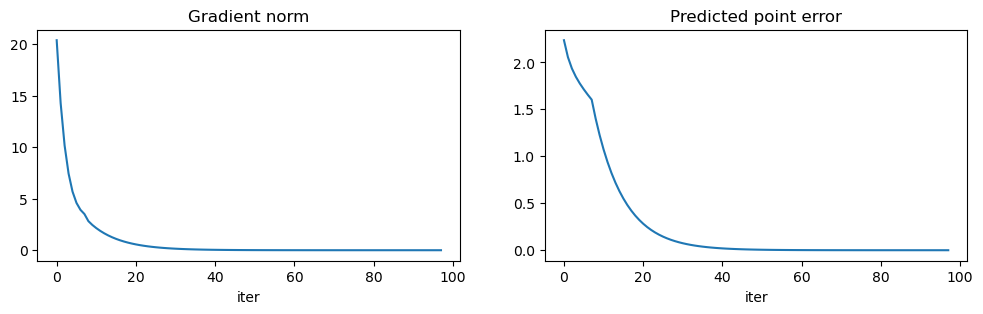

In [8]:
f, grad_f, x_true, input_size = testCase2()

for alpha in [0.01, 0.1, 0.2, 0.5, None]:
    runTestCase(
        f, grad_f, x_true, 
        x0 = np.zeros((input_size,)), 
        k_max = 200, 
        tol_f = 1e-6, 
        tol_x = 1e-6,
        alpha = alpha
    )

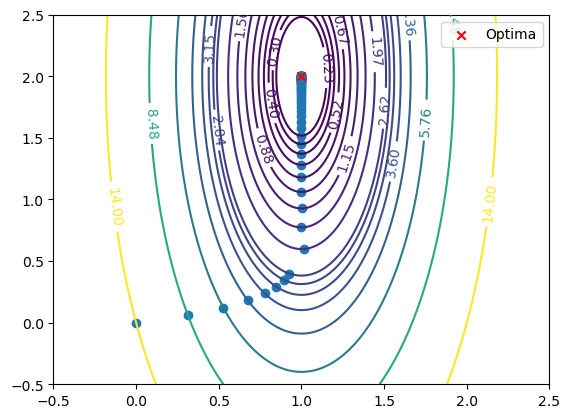

In [9]:
showContour(
    f, grad_f, x_true, 
    x0 = np.zeros((input_size,)),
    k_max = 200, 
    tol_f = 1e-6, 
    tol_x = 1e-6, 
    alpha = None,
    contour_area=(-0.5, 2.5)
)

## Test case 3

\begin{equation*}
    f(x) = \frac{1}{2} \Vert Ax - b \Vert^2_2
\end{equation*}

\begin{equation*}
    \nabla f(x) = x^T A^TA - b^T A
\end{equation*}

>>>>> n = 5 <<<<<
alpha: 0.001 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.60656075 0.64701453 0.71027217 0.81891769 1.09236145] | f(pred)=0.7619974000388251
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.2844843890854472


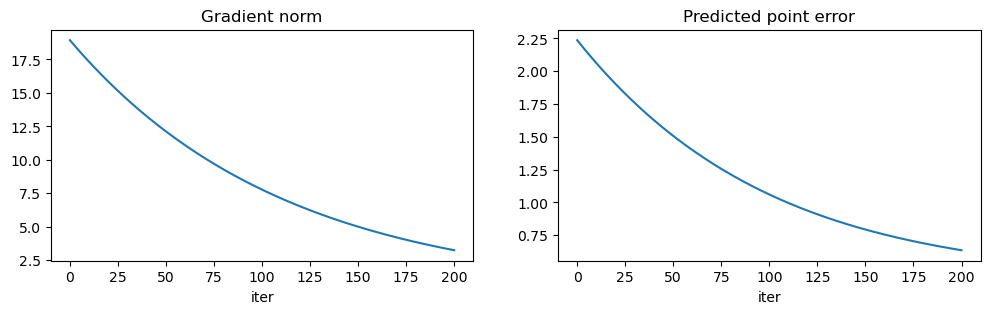

alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.93127239 0.96425404 1.00763707 1.06004354 1.00372208] | f(pred)=0.0012158767345641403
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.043996961693637295


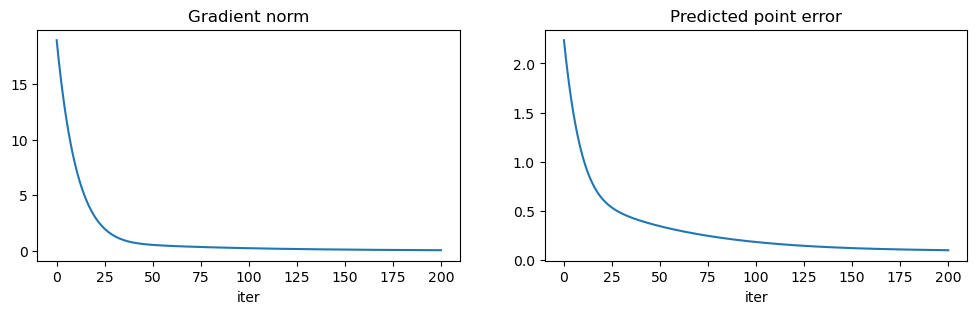

alpha: 0.05 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.97239344 0.9912653  1.01227511 1.0274075  0.99188957] | f(pred)=8.562652239848007e-05
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.019005502539063888


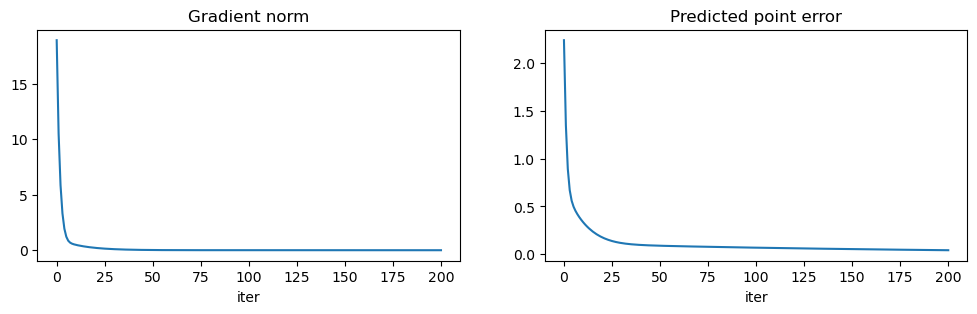

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98646998 0.99837466 1.00875379 1.00739586 0.99720833] | f(pred)=1.1396129857838962e-05
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.008060076922811592


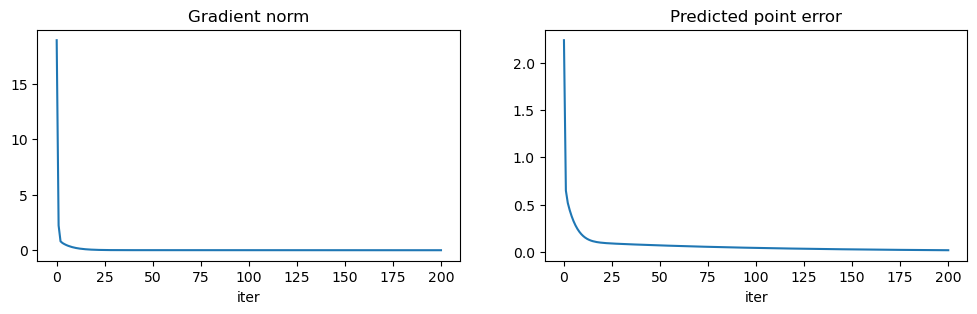

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.99367385 1.00180756 1.00671432 0.99764991 0.99983411] | f(pred)=3.1932432896961704e-07
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.004334051718519916


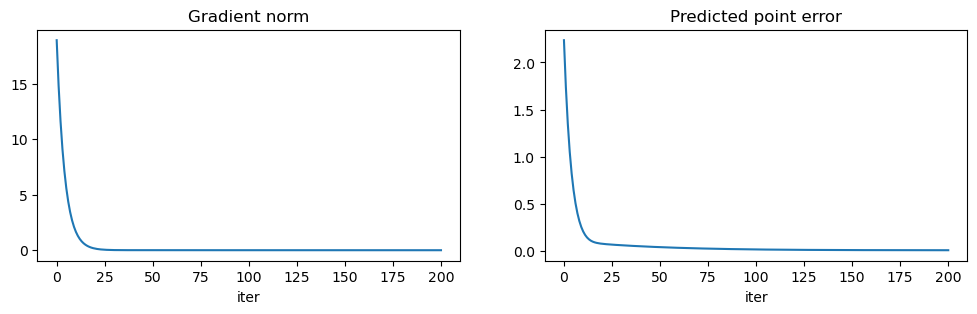

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.99321133 1.00161309 1.00687243 0.99819808 0.99967185] | f(pred)=5.028085146602176e-07
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.004455849668453983


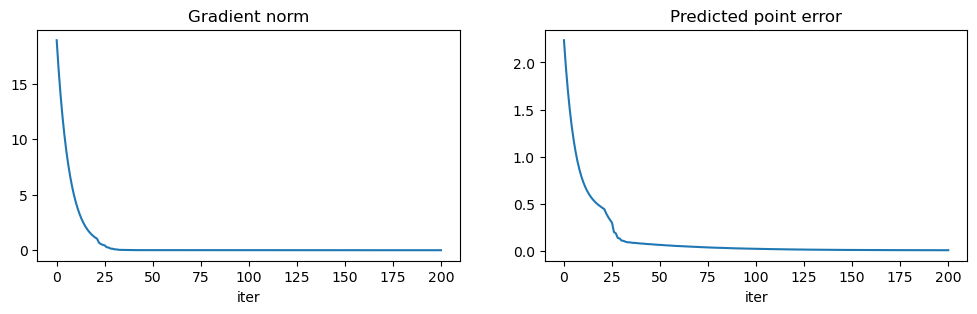

>>>>> n = 10 <<<<<
alpha: 0.001 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.74597014 0.76606905 0.7900298  0.81889111 0.85410024 0.89773991
 0.95291938 1.02444502 1.11972029 1.23642896] | f(pred)=0.5713087212392447
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.1734740265949859


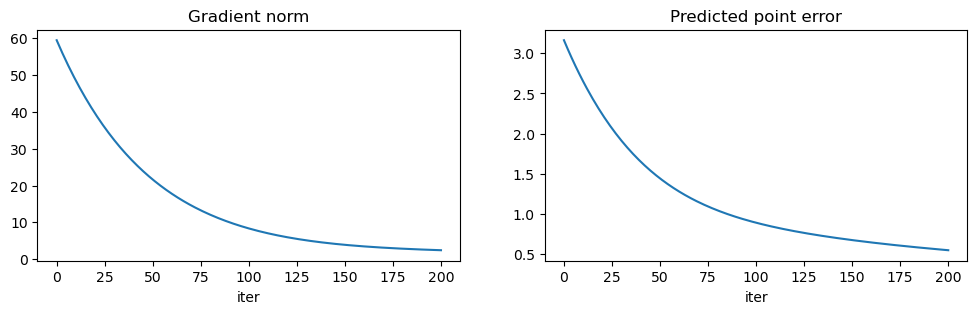

alpha: 0.01 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.94169672 0.954933   0.9696799  0.98590657 1.00334478 1.02119434
 1.037427   1.04698375 1.03644405 0.97102844] | f(pred)=0.0026827012443338006
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.03575528095309512


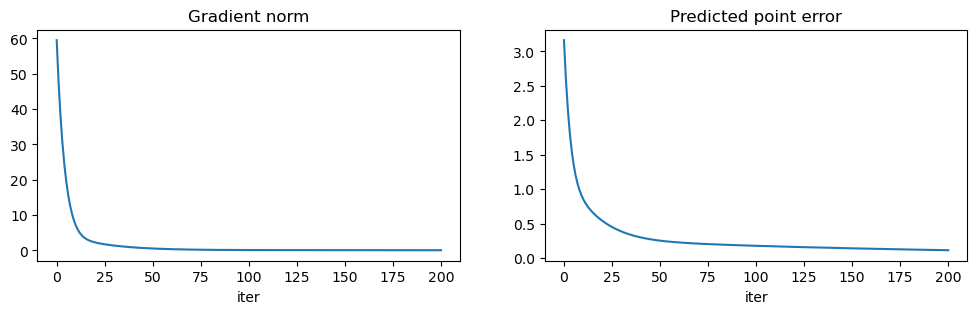

alpha: 0.05 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98186786 0.98916564 0.99662258 1.00382964 1.01004502 1.01394626
 1.01321448 1.00403618 0.98223728 1.00271835] | f(pred)=2.3578305164334876e-05
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.011320107794020652


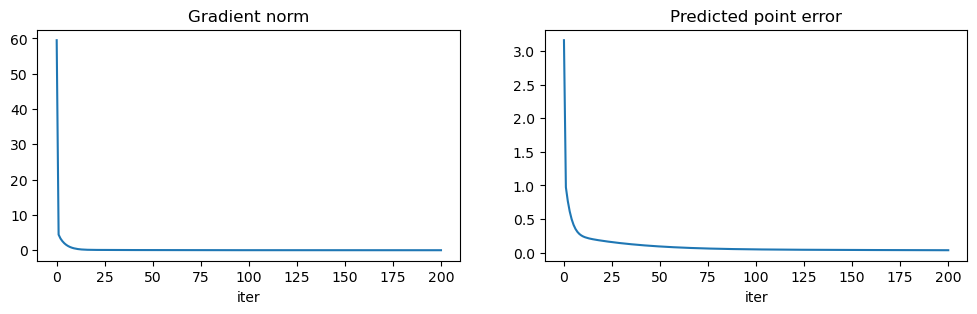

alpha: 0.1 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [ -794.76309739  -827.19630514  -867.27204738  -917.77432451
  -983.08363719 -1070.58159664 -1193.94374072 -1382.31109872
 -1712.88614578 -2594.19173786] | f(pred)=183826030.77136627
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 1343.4196802991057


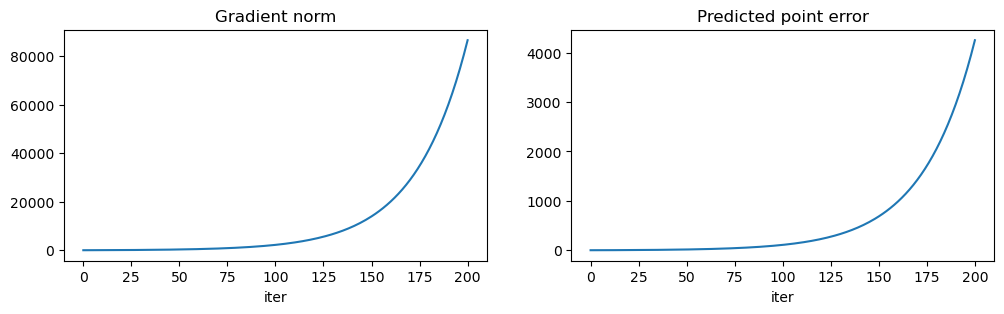

alpha: 0.2 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-1.91829071e+97 -1.99649024e+97 -2.09311332e+97 -2.21487035e+97
 -2.37231976e+97 -2.58325369e+97 -2.88063547e+97 -3.33470939e+97
 -4.13158420e+97 -6.25615628e+97] | f(pred)=1.0682737230609832e+197
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 3.2385415561716797e+97


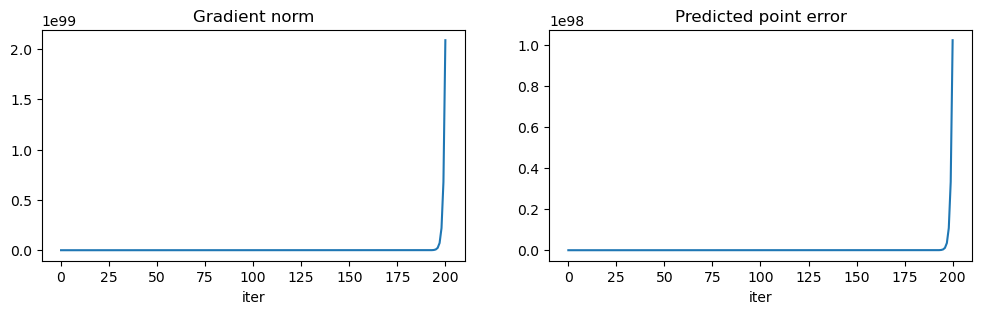

alpha: backtracking | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98888909 0.99392637 0.99885841 1.00332719 1.00675622 1.00825003
 1.00652294 1.00020051 0.99049319 1.00175636] | f(pred)=6.99434650861167e-06
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.006499825395836188


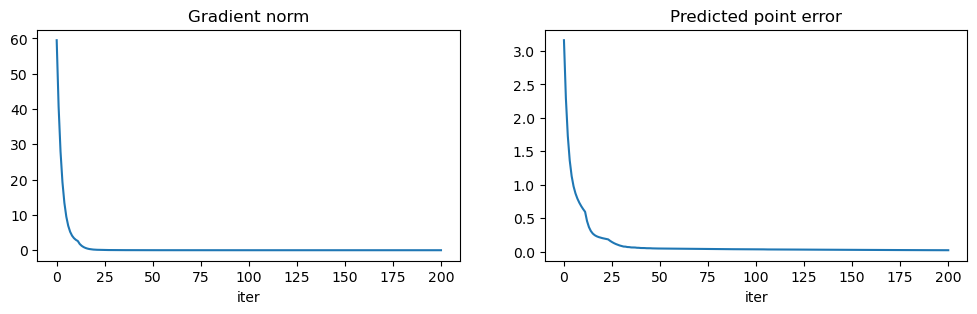

>>>>> n = 15 <<<<<
alpha: 0.001 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.80519419 0.81812755 0.83250723 0.84854191 0.86647881 0.88661133
 0.90928701 0.93491351 0.9639555  0.99690247 1.03414606 1.07555997
 1.11895876 1.153215   1.093145  ] | f(pred)=0.4470217550154103
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.12101138883493373


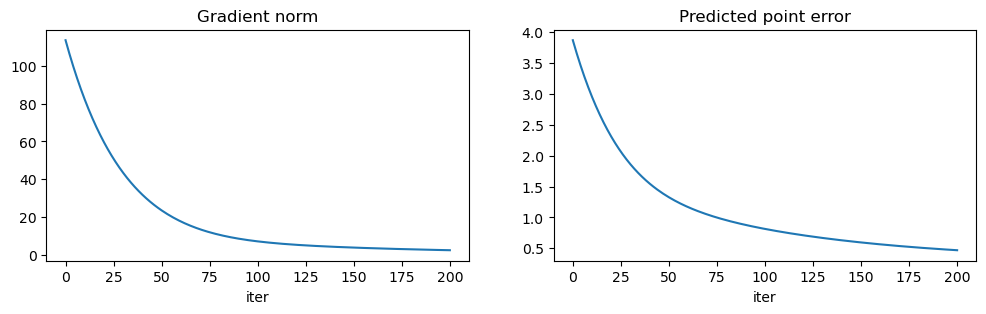

alpha: 0.01 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.95629962 0.96384422 0.9718295  0.98021904 0.98893922 0.99785812
 1.00675181 1.01524964 1.02274346 1.02823473 1.03007665 1.02556522
 1.01053419 0.98125972 0.99376228] | f(pred)=0.0014306366174787076
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.023353259296892463


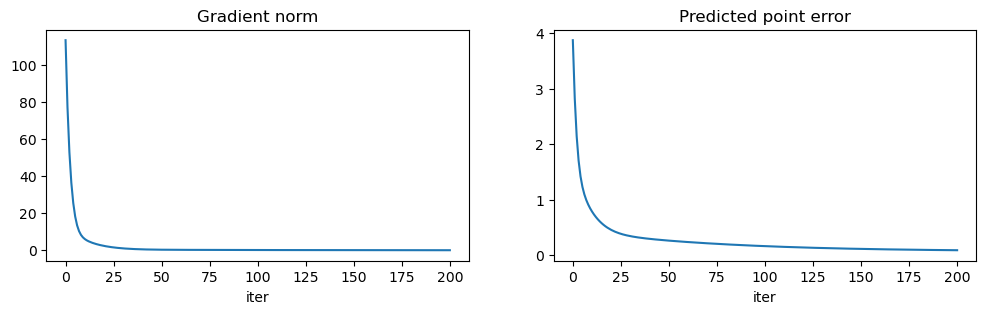

alpha: 0.05 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98310864 0.9874107  0.99177088 0.99610938 1.00031164 1.00421531
 1.0075929  1.01012967 1.01139867 1.01084369 1.00780957 1.00175982
 0.99319514 0.98735269 1.00369111] | f(pred)=5.5434568658285924e-05
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.009078466249878453


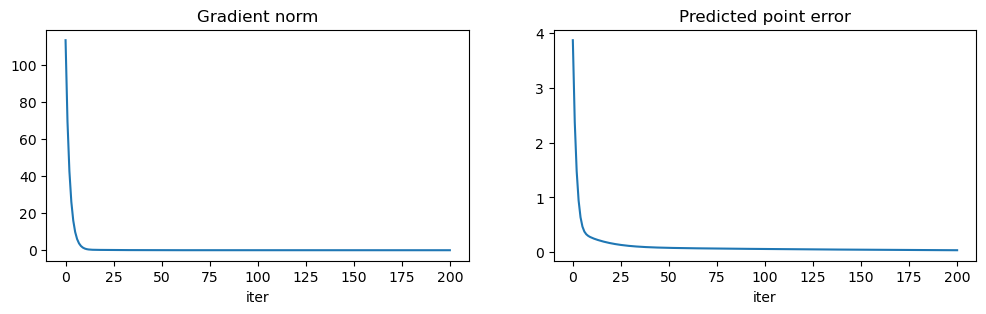

alpha: 0.1 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-1.78171780e+69 -1.82934125e+69 -1.88384616e+69 -1.94670141e+69
 -2.01983725e+69 -2.10584898e+69 -2.20832257e+69 -2.33237933e+69
 -2.48563898e+69 -2.68004476e+69 -2.93564701e+69 -3.28945729e+69
 -3.82010139e+69 -4.73712074e+69 -7.07090302e+69] | f(pred)=2.4610200128420152e+141
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 3.188743802311079e+69


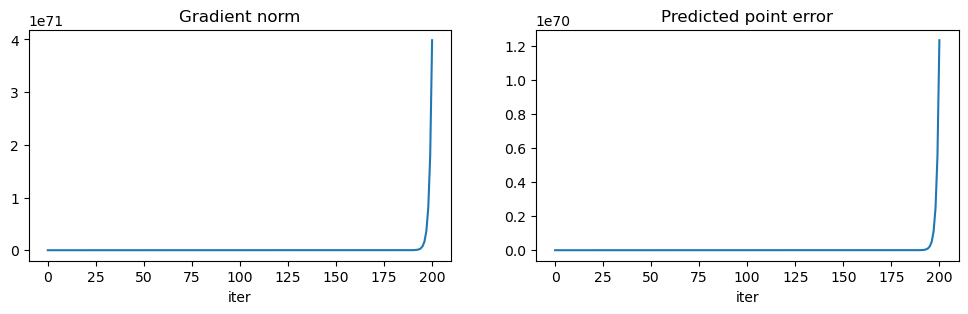

alpha: 0.2 | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-1.11941226e+147 -1.14933297e+147 -1.18357715e+147 -1.22306766e+147
 -1.26901722e+147 -1.32305641e+147 -1.38743821e+147 -1.46538021e+147
 -1.56166972e+147 -1.68381039e+147 -1.84439940e+147 -2.06669024e+147
 -2.40008171e+147 -2.97622385e+147 -4.44248550e+147] | f(pred)=9.714432204304675e+296
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 2.003414283118414e+147


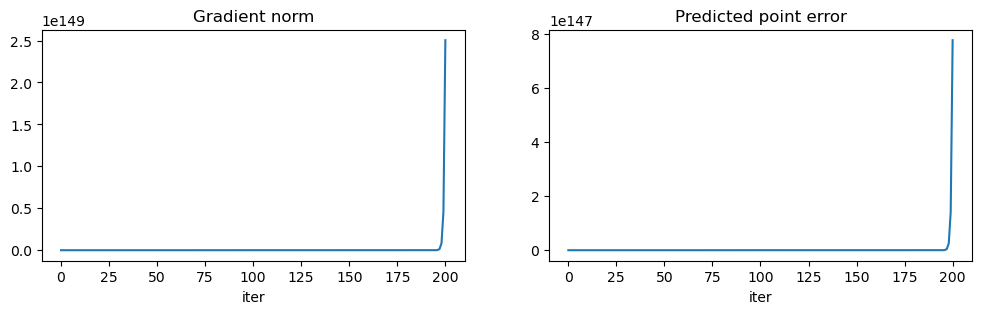

alpha: backtracking | x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98417866 0.98829654 0.99245459 0.99657224 1.00053507 1.00418258
 1.00729237 1.00956074 1.0105829  1.00984573 1.00677714 1.00099998
 0.99330586 0.98928215 1.00326206] | f(pred)=4.473012999090224e-05
   || Real: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.0083447621709659


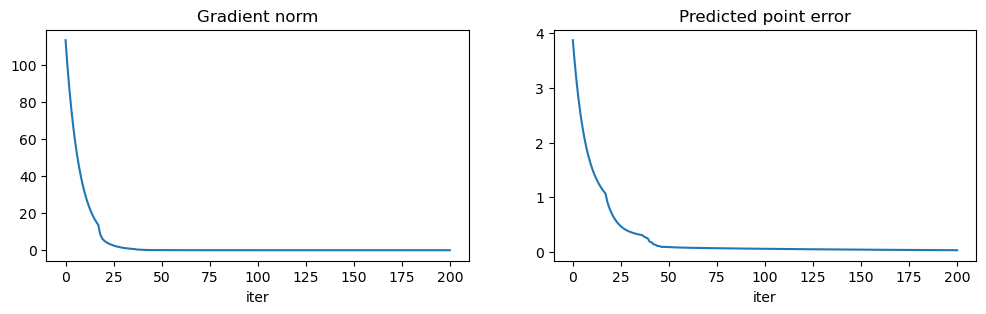

In [10]:
for n in [5, 10, 15]:
    print(f">>>>> n = {n} <<<<<")
    f, grad_f, x_true, input_size = testCase3(n)

    for alpha in [0.001, 0.01, 0.05, 0.1, 0.2, None]:
        runTestCase(
            f, grad_f, x_true, 
            x0 = np.zeros((input_size,)), 
            k_max = 200, 
            tol_f = 1e-6, 
            tol_x = 1e-6,
            alpha = alpha
        )

#### Vandermonde with different initialization

>>>>> n = 3 <<<<<
alpha: backtracking | x0: [0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.98693    1.0572904  0.94357781] | f(pred)=9.409921608624735e-05
   || Real: [1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 0.047033600941326116


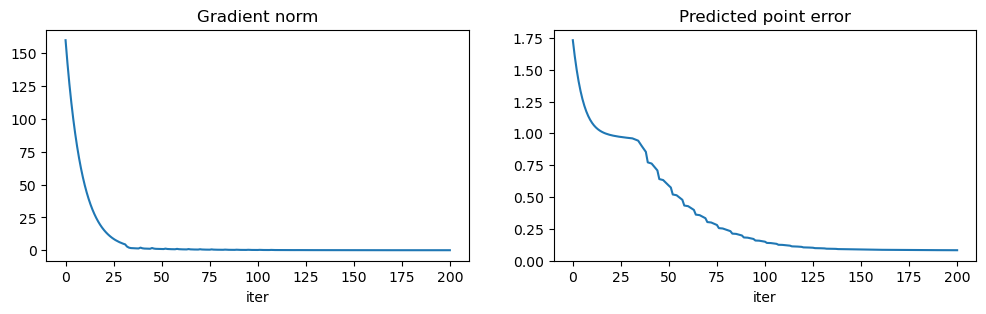

>>>>> n = 4 <<<<<
alpha: backtracking | x0: [0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-3.28616998e+123 -8.75331739e+122 -2.39108103e+122 -6.79203430e+121] | f(pred)=3.0602614553755695e+250
   || Real: [1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: 1.70491236354684e+123


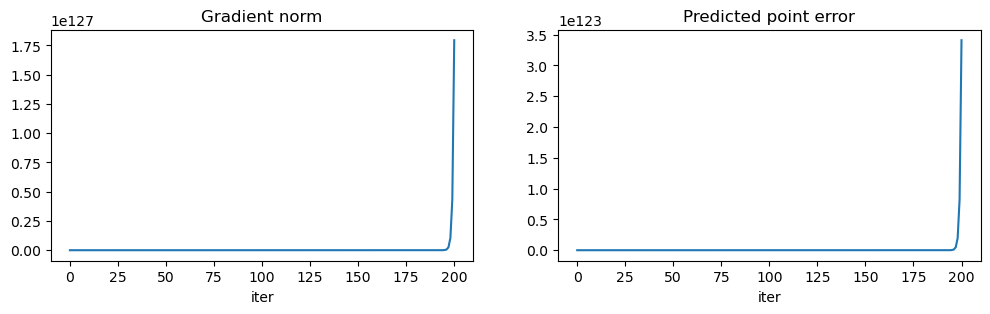

>>>>> n = 5 <<<<<
alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [nan nan nan nan nan] | f(pred)=nan
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.0
   || Rel. error: nan


/tmp/ipykernel_139462/3644150988.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
/tmp/ipykernel_139462/2953125371.py:7: RuntimeWarning: overflow encountered in matmul
  return (1/2) * np.linalg.norm(A@x - b, 2)**2
/tmp/ipykernel_139462/2953125371.py:10: RuntimeWarning: overflow encountered in matmul
  return (x.T @ A.T @ A - b.T @ A)
/tmp/ipykernel_139462/3644150988.py:14: RuntimeWarning: invalid value encountered in subtract
  while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
/tmp/ipykernel_139462/3107767788.py:17: RuntimeWarning: invalid value encountered in subtract
  curr_x = curr_x - alpha*grad_fn(curr_x)


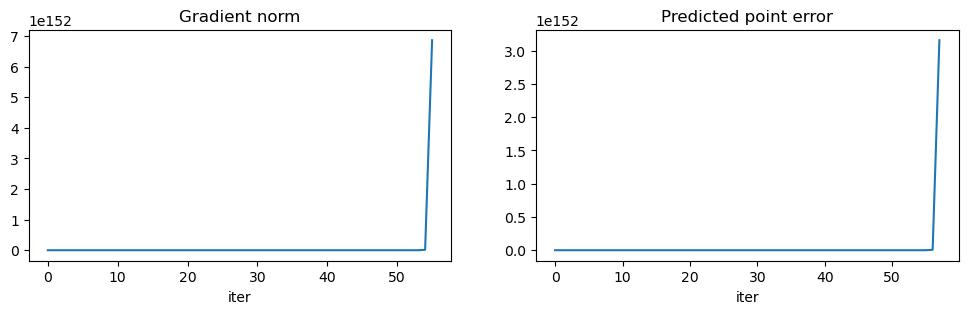

In [11]:
def testCase3_2(n):
    x_true = np.ones((n,))
    A = np.vander(range(1, n+1))
    b = A @ x_true

    def f(x):
        return (1/2) * np.linalg.norm(A@x - b, 2)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A)
    
    return f, grad_f, x_true, n


for n in [3, 4, 5]:
    print(f">>>>> n = {n} <<<<<")
    f, grad_f, x_true, input_size = testCase3_2(n)
    runTestCase(
        f, grad_f, x_true, 
        x0 = np.zeros((input_size,)), 
        k_max = 200,
        tol_f = 1e-6, 
        tol_x = 1e-6, 
        alpha = None
    )

## Test case 4

\begin{equation*}
    f(x) = \frac{1}{2} \Vert Ax - b \Vert^2_2 + \frac{\lambda}{2} \Vert x \Vert^2_2
\end{equation*}

\begin{equation*}
    \nabla f(x) = (x^T A^TA - b^T A) + (\lambda x^T)
\end{equation*}

>>>>> lambda = 0.1 <<<<<
alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.90790657 0.94163118 0.98677869 1.04382212 1.01176779] | f(pred)=0.24630801616889975
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.25000000000000006
   || Rel. error: 0.053144674117101866


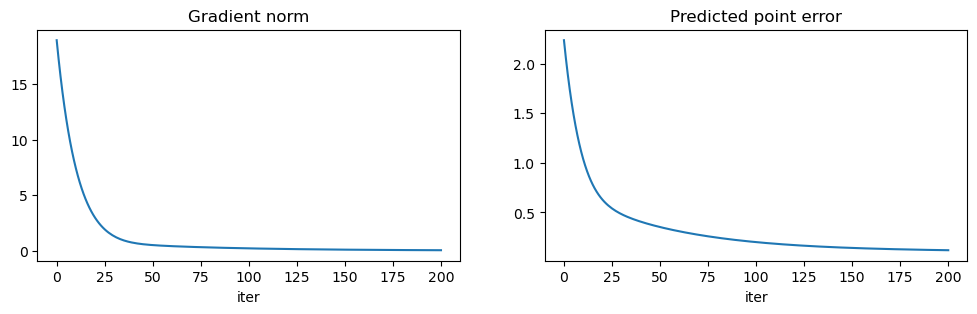

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.93821811 0.96170046 0.99060413 1.02056761 1.00224197] | f(pred)=0.24567229518983033
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.25000000000000006
   || Rel. error: 0.034059335457276844


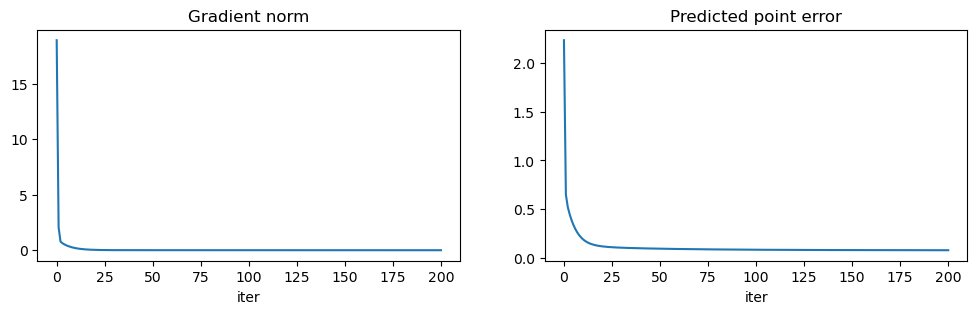

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 157/200
   || Prediction: [0.93870562 0.96193866 0.99047291 1.0198939  1.00242242] | f(pred)=0.2456721987529258
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.25000000000000006
   || Rel. error: 0.03375816444276272


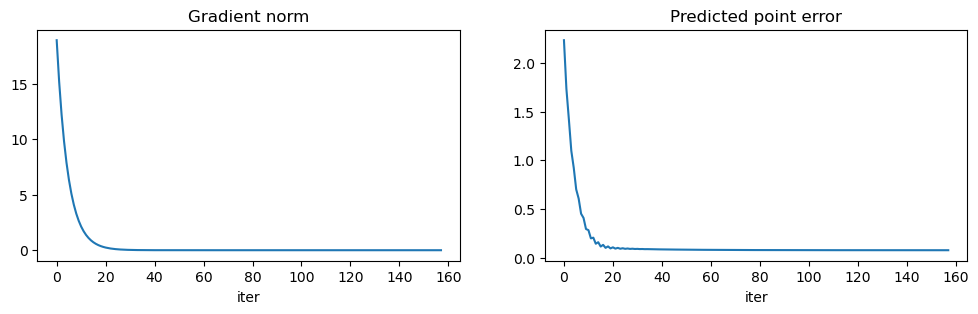

alpha: 0.5 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-7.12517878e+108 -7.74351409e+108 -8.75677067e+108 -1.06249628e+109
 -1.65657045e+109] | f(pred)=2.5919309610035086e+219
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.25000000000000006
   || Rel. error: 1.072122770406127e+109


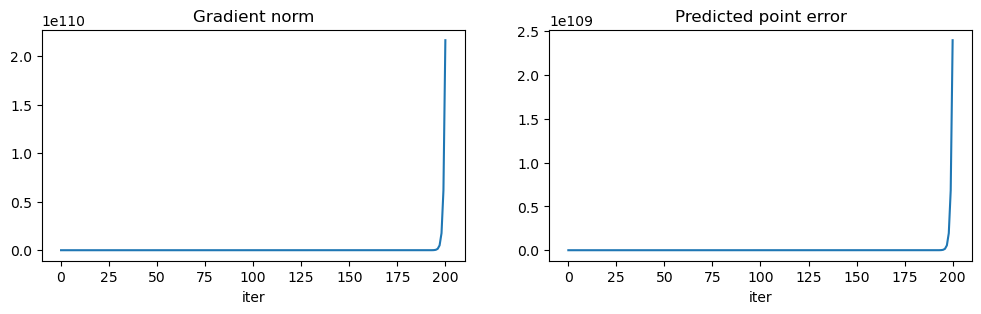

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 165/200
   || Prediction: [0.9387067  0.96193942 0.99047299 1.01989242 1.00242315] | f(pred)=0.24567219871694362
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.25000000000000006
   || Rel. error: 0.03375743264423389


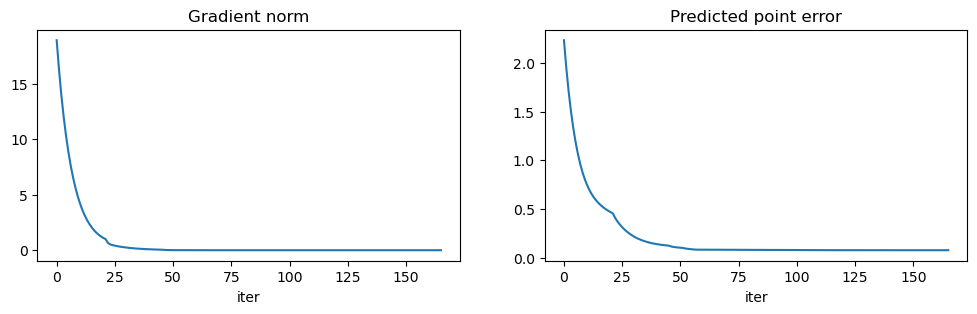

>>>>> lambda = 0.325 <<<<<
alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.86105282 0.8960294  0.9442949  1.00979272 1.02368898] | f(pred)=0.7713822415384862
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.8125000000000002
   || Rel. error: 0.08231200183130262


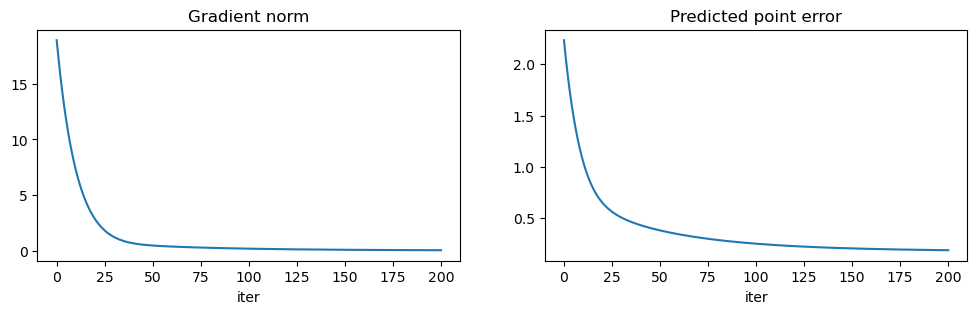

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 148/200
   || Prediction: [0.87299302 0.90468815 0.9476291  1.00388997 1.01652928] | f(pred)=0.7711818353792865
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.8125000000000002
   || Rel. error: 0.07516140069450117


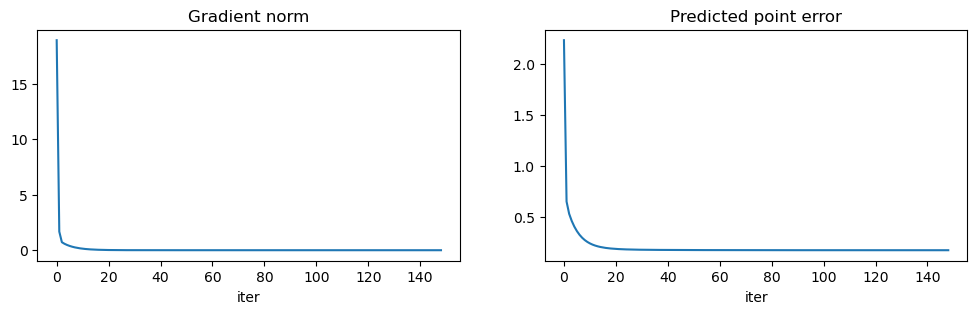

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 85/200
   || Prediction: [0.87300909 0.90469656 0.94762586 1.0038688  1.0165364 ] | f(pred)=0.7711818350465669
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.8125000000000002
   || Rel. error: 0.07515438722760619


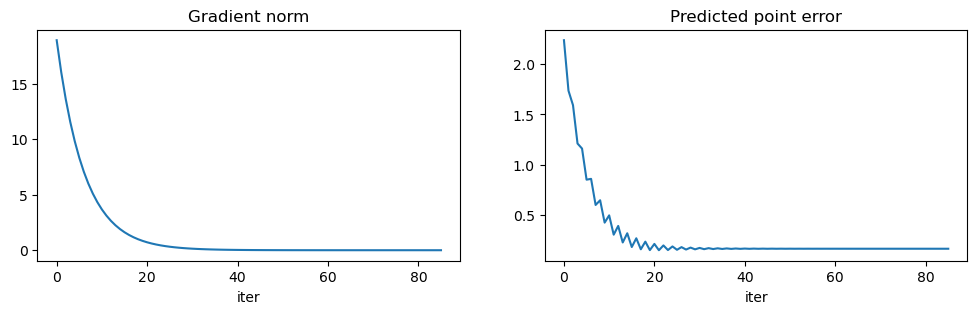

alpha: 0.5 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-3.82338162e+111 -4.15518128e+111 -4.69889628e+111 -5.70137101e+111
 -8.88918190e+111] | f(pred)=7.649408758178493e+224
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.8125000000000002
   || Rel. error: 5.75302687312387e+111


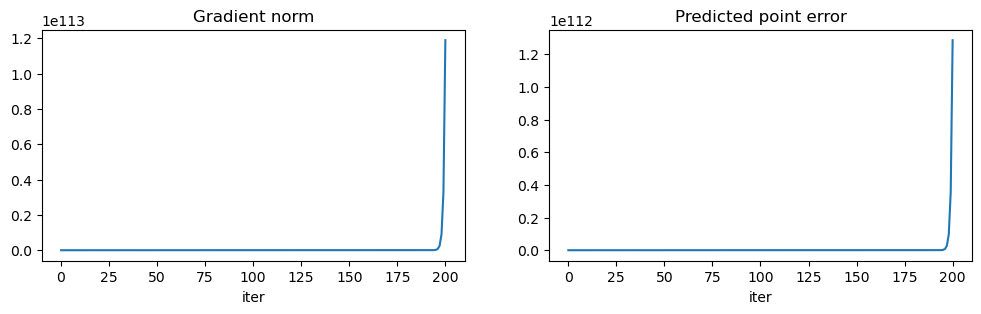

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 104/200
   || Prediction: [0.87299406 0.90468868 0.94762885 1.00388847 1.01652968] | f(pred)=0.7711818353445291
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=0.8125000000000002
   || Rel. error: 0.07516095227426166


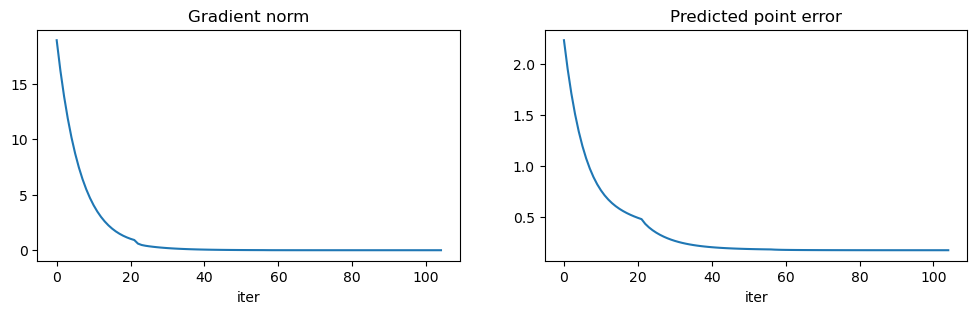

>>>>> lambda = 0.55 <<<<<
alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.82069313 0.85647013 0.90692831 0.97871322 1.02890384] | f(pred)=1.2644221363250627
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.3750000000000004
   || Rel. error: 0.11198452842900777


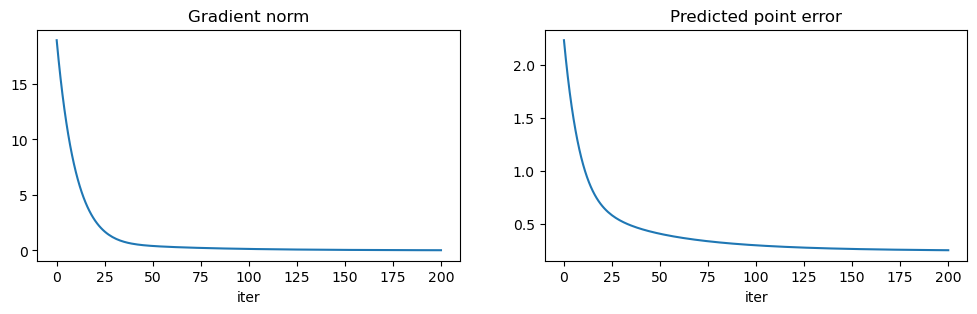

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 96/200
   || Prediction: [0.82652626 0.86089264 0.90902613 0.9766727  1.02452749] | f(pred)=1.2643532872658834
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.3750000000000004
   || Rel. error: 0.10850437857953978


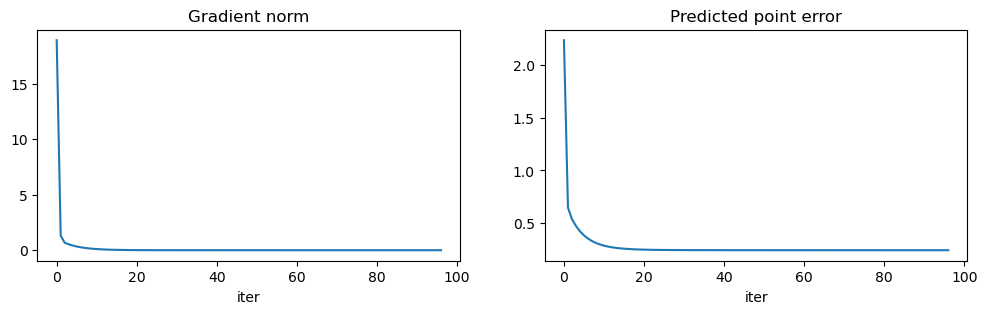

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 124/200
   || Prediction: [0.82654036 0.86089948 0.90902184 0.97665098 1.02453177] | f(pred)=1.2643532870376084
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.3750000000000004
   || Rel. error: 0.1084999641891873


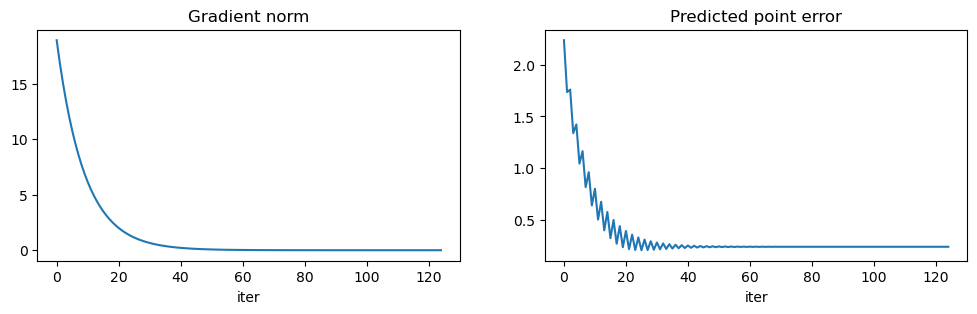

alpha: 0.5 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-1.69253587e+114 -1.83941705e+114 -2.08010899e+114 -2.52388484e+114
 -3.93506605e+114] | f(pred)=1.5355065714471233e+230
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.3750000000000004
   || Rel. error: 2.5467518795667685e+114


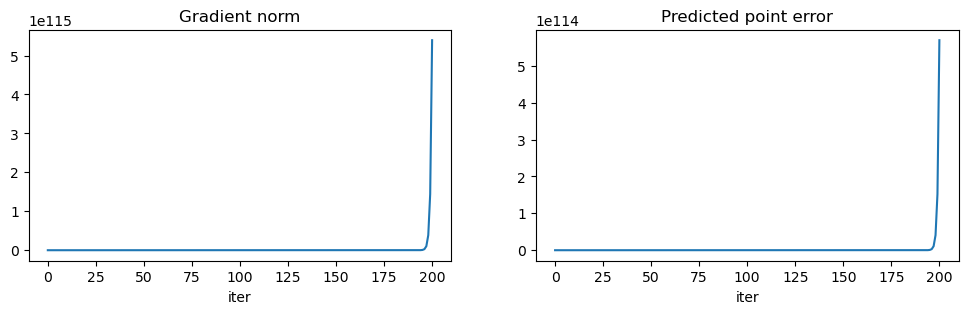

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 86/200
   || Prediction: [0.82652565 0.86089233 0.90902629 0.97667356 1.02452726] | f(pred)=1.2643532872865355
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.3750000000000004
   || Rel. error: 0.10850457881037306


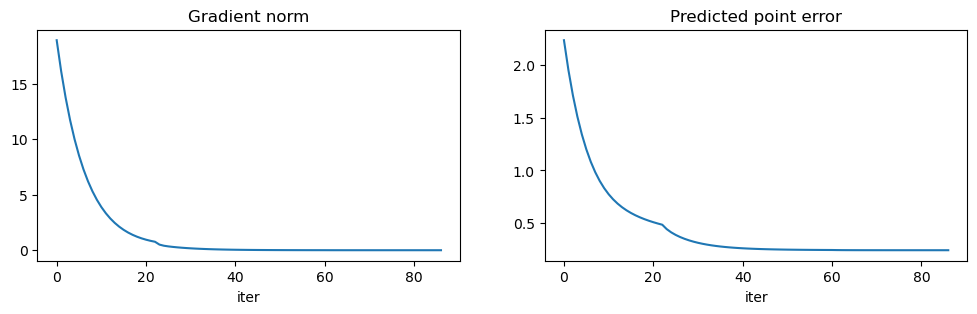

>>>>> lambda = 0.775 <<<<<
alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.78546745 0.82171375 0.87367716 0.95011948 1.02915977] | f(pred)=1.7296185682011698
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.9375000000000004
   || Rel. error: 0.1393599797227526


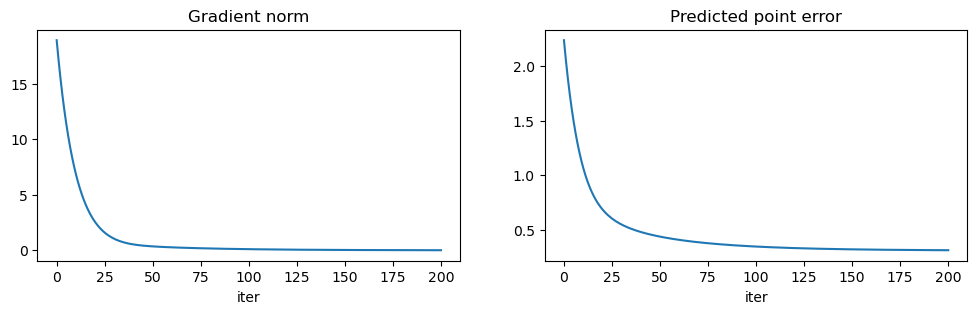

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 70/200
   || Prediction: [0.78854139 0.82410584 0.87493277 0.9493147  1.02657191] | f(pred)=1.729594246115618
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.9375000000000004
   || Rel. error: 0.13752845241797998


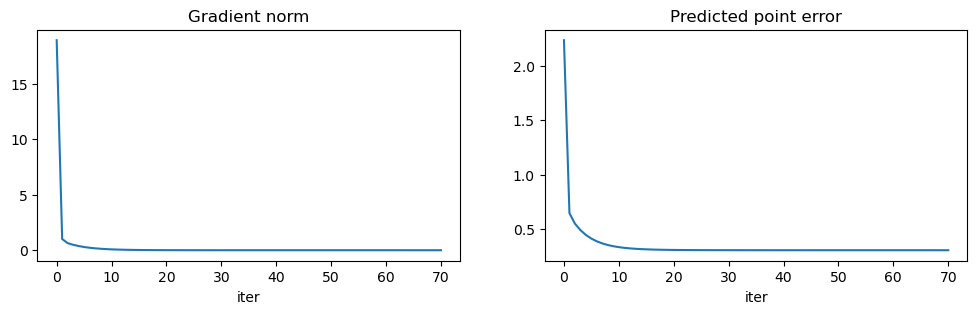

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.78855078 0.8241095  0.87492759 0.94929554 1.02657166] | f(pred)=1.729594246127686
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.9375000000000004
   || Rel. error: 0.13752697630620495


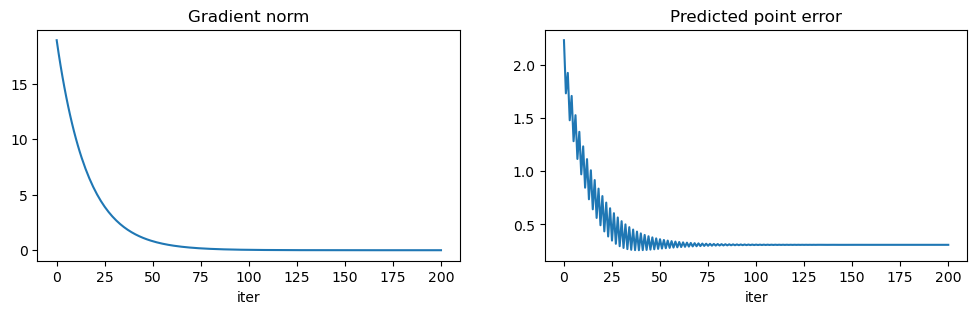

alpha: 0.5 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-6.25216013e+116 -6.79473338e+116 -7.68383983e+116 -9.32313016e+116
 -1.45359774e+117] | f(pred)=2.1450341252194377e+235
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.9375000000000004
   || Rel. error: 9.407600075948608e+116


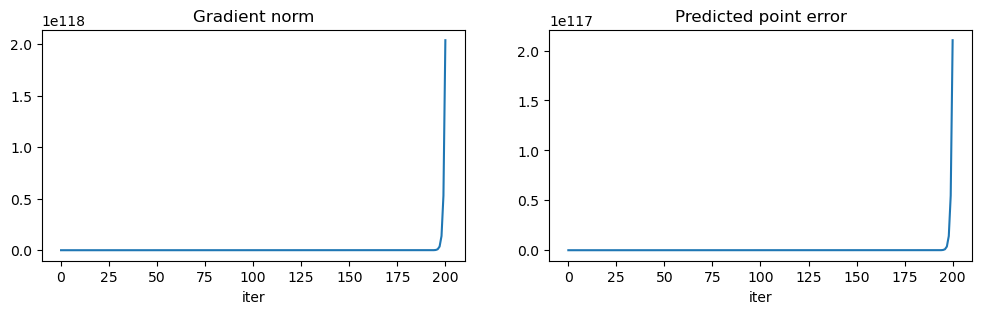

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 79/200
   || Prediction: [0.78854296 0.82410665 0.87493239 0.94931245 1.0265725 ] | f(pred)=1.729594246064549
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=1.9375000000000004
   || Rel. error: 0.13752802200388414


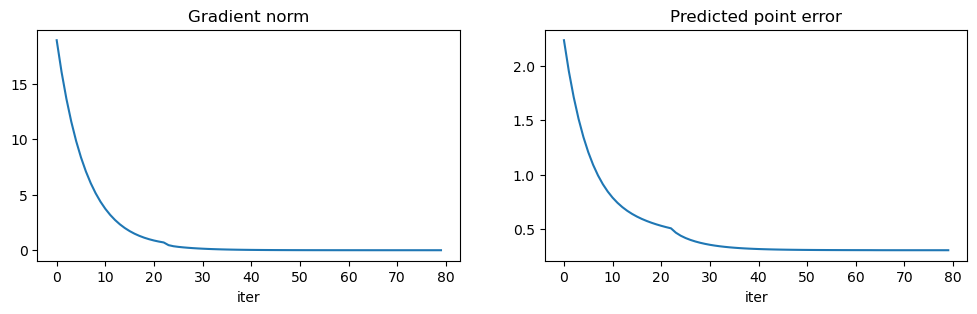

>>>>> lambda = 1.0 <<<<<
alpha: 0.01 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.75435521 0.79082705 0.8437818  0.92364663 1.02574543] | f(pred)=2.170134976717745
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=2.5000000000000004
   || Rel. error: 0.1643115816014384


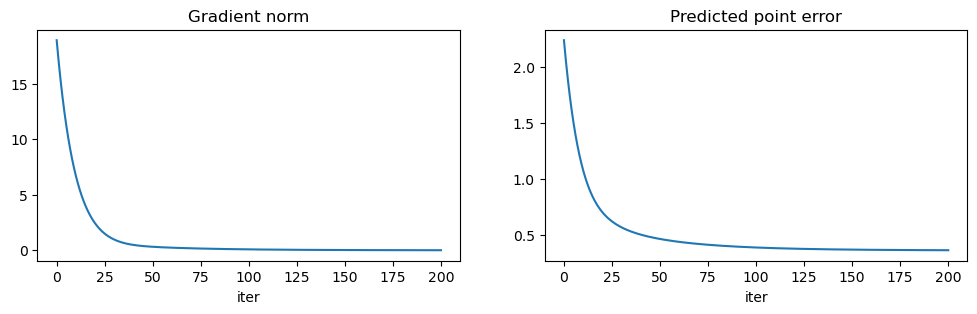

alpha: 0.1 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 55/200
   || Prediction: [0.75603597 0.79215774 0.84452387 0.92330681 1.02422618] | f(pred)=2.170126257023359
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=2.5000000000000004
   || Rel. error: 0.16331468650161363


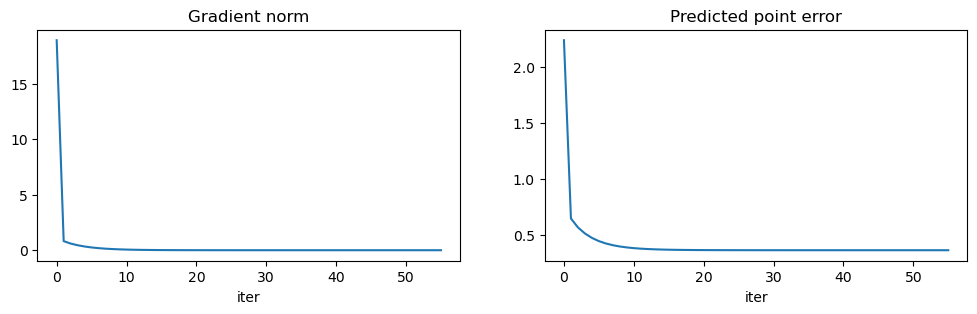

alpha: 0.2 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [0.73377336 0.76795794 0.81715005 0.89008271 0.97244904] | f(pred)=2.197977402182763
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=2.5000000000000004
   || Rel. error: 0.18492977665251883


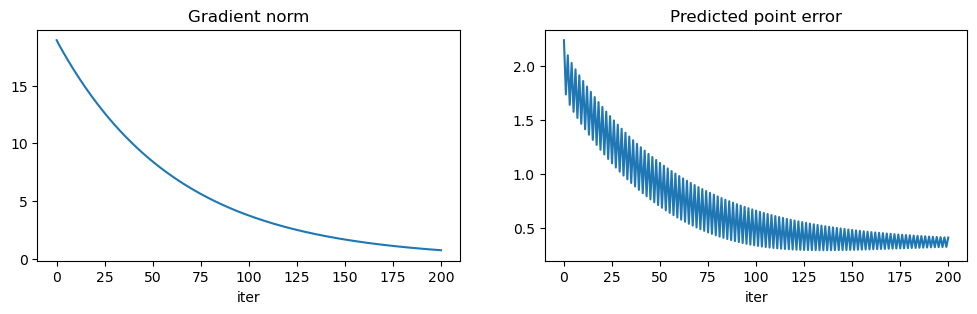

alpha: 0.5 | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 200/200
   || Prediction: [-1.94741463e+119 -2.11641463e+119 -2.39335234e+119 -2.90395634e+119
 -4.52764715e+119] | f(pred)=2.1293889335010898e+240
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=2.5000000000000004
   || Rel. error: 2.9302669230312466e+119


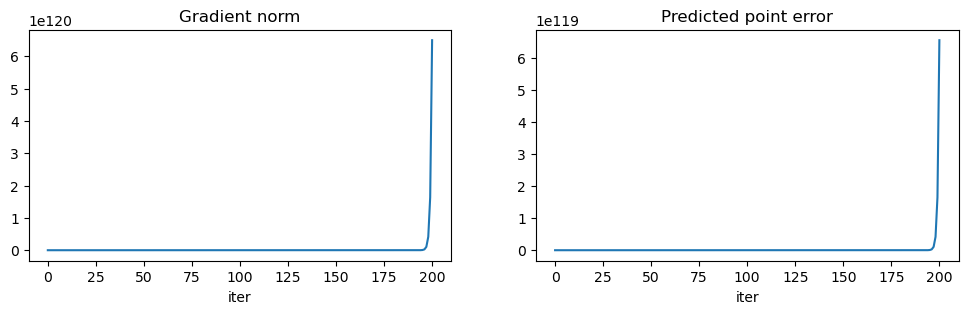

alpha: backtracking | x0: [0. 0. 0. 0. 0.] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 76/200
   || Prediction: [0.75603811 0.79215884 0.84452337 0.92330377 1.02422696] | f(pred)=2.1701262569577344
   || Real: [1. 1. 1. 1. 1.] | f(x_true)=2.5000000000000004
   || Rel. error: 0.16331417088463593


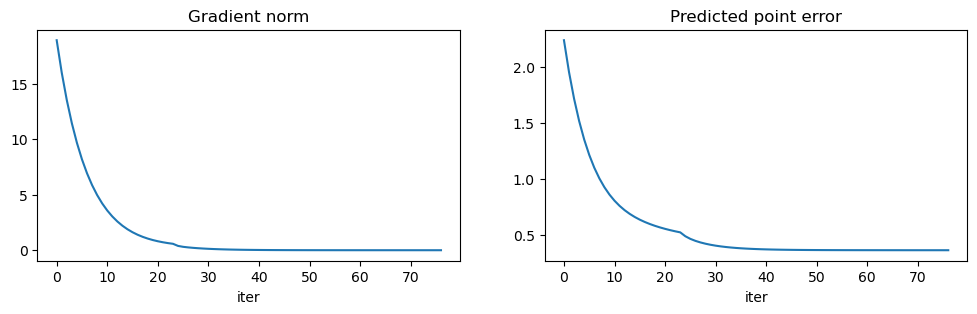

In [12]:
for lamb in np.linspace(0.1, 1, 5):
    print(f">>>>> lambda = {lamb} <<<<<")
    f, grad_f, x_true, input_size = testCase4(lamb=lamb)

    for alpha in [0.01, 0.1, 0.2, 0.5, None]:
        runTestCase(
            f, grad_f, x_true, 
            x0 = np.zeros((input_size,)), 
            k_max = 200, 
            tol_f = 1e-6, 
            tol_x = 1e-6, 
            alpha = alpha
        )

## Test case 5 (non-convex function)

\begin{equation*}
    f(x) = x^4 + x^3 - 2x^2 - 2x
\end{equation*}

\begin{equation*}
    \nabla f(x) = 4x^3 + 3x^2 - 4x - 2
\end{equation*}

In [13]:
f, grad_f, x_true, in_size = testCase5()

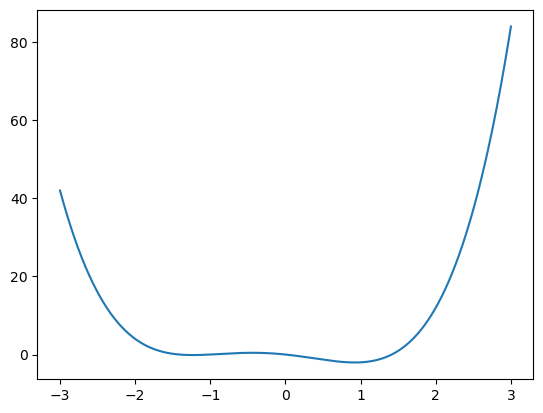

In [14]:
x_axis = np.linspace(-3, 3, 1000)
y_axis = f(x_axis)
plt.plot(x_axis, y_axis)
plt.show()

alpha: backtracking | x0: [-2] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 95/100
   || Prediction: [-1.23224773] | f(pred)=[-0.13781767]


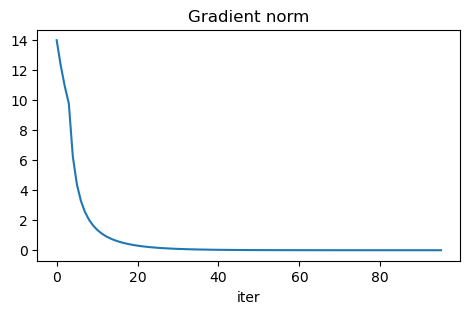

alpha: backtracking | x0: [-0.5] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 77/100
   || Prediction: [-1.23223208] | f(pred)=[-0.13781767]


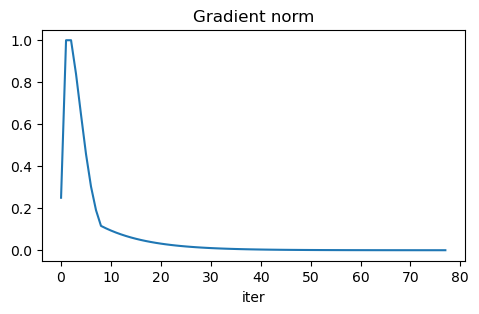

alpha: backtracking | x0: [2] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 64/100
   || Prediction: [0.92222848] | f(pred)=[-2.03774804]


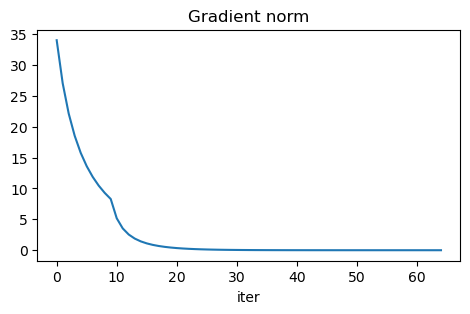

alpha: backtracking | x0: [0] | tol_f: 1e-06 | tol_x: 1e-06 | Iterations: 59/100
   || Prediction: [0.92222115] | f(pred)=[-2.03774804]


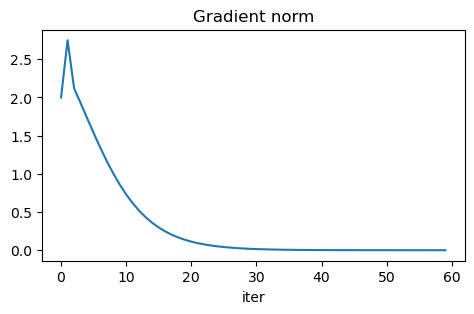

In [15]:
runTestCase(f, grad_f, x_true, np.array([-2]), 100, 1e-6, 1e-6, None)
runTestCase(f, grad_f, x_true, np.array([-0.5]), 100, 1e-6, 1e-6, None)
runTestCase(f, grad_f, x_true, np.array([2]), 100, 1e-6, 1e-6, None)
runTestCase(f, grad_f, x_true, np.array([0]), 100, 1e-6, 1e-6, None)